In [44]:
from tasks.task1.main import *

In [36]:
from matplotlib import pyplot as plt
import numpy as np

from tasks.task1.main import solve_linear_equation, find_matrix_condition_numbers


def matrix_and_n(matrix, cond_value=10 ** 4):
    n = matrix.shape[0]
    standard_vector = np.ones(n)
    b = matrix.dot(standard_vector)
    solution = solve_linear_equation(matrix, b)

    discrepancies = []
    condition_numbers = find_matrix_condition_numbers(matrix)
    digits = []
    for i in range(20, 1, -1):
        varied_matrix = np.round(matrix, i)
        varied_b = np.around(b)
        varied_solution = solve_linear_equation(varied_matrix, varied_b)
        discrepancies.append(np.linalg.norm(solution - varied_solution))
        digits.append(i)

    plt.title("Discrepancy to digits dependency")
    plt.plot(digits, discrepancies)
    plt.xlabel("Digits")
    plt.ylabel("Discrepancy")
    plt.show()

    print(f"n: {n}")
    print(f"Condidion numbers")
    for name, value in condition_numbers:
        print(f"{name} -> {value}, {value > cond_value} that it is > {cond_value}")

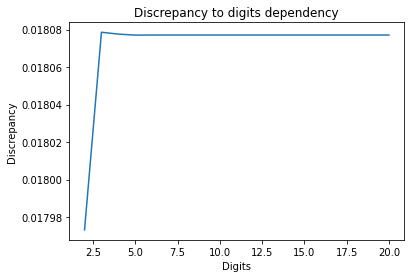

n: 11
Condidion numbers
Spectral -> 17.54346504914451, False that it is > 10000
Angular -> 1.0, False that it is > 10000
Volume -> 0.9999999999999971, False that it is > 10000


In [37]:
n = 11
matrix = generate_random_diagonal_matrix(n)
matrix_and_n(matrix)

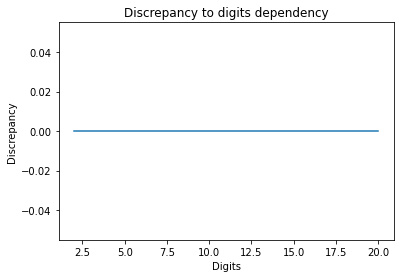

n: 11
Condidion numbers
Spectral -> 122.4708582117032, True that it is > 62.43898824003263
Angular -> 14.79864858694874, False that it is > 62.43898824003263
Volume -> 1322.724461102916, True that it is > 62.43898824003263


In [38]:
n = 11
matrix = generate_tridiagonal_matrix(n)
cond_value = 5 * 6 ** ((n / 2 - 1) / n + 1)
matrix_and_n(matrix, cond_value)

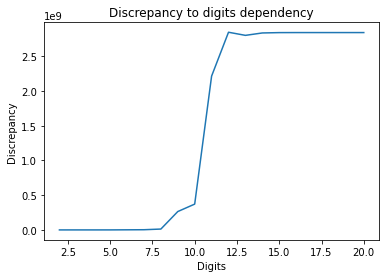

n: 9
Condidion numbers
Spectral -> 501730276729.3524, True that it is > 10000
Angular -> 55774374387.79647, True that it is > 10000
Volume -> 6.0275370811214015e+38, True that it is > 10000


In [39]:
n = 9
matrix = generate_hilbert_matrix(n)
matrix_and_n(matrix)

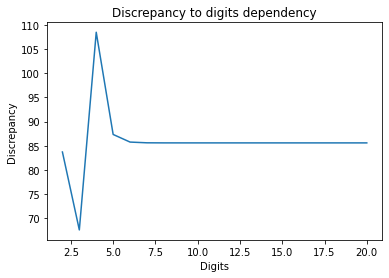

n: 4
Condidion numbers
Spectral -> 15613.79355964483, True that it is > 10000
Angular -> 4020.9134534334476, False that it is > 10000
Volume -> 937085.8716080086, True that it is > 10000


In [40]:
n = 4
matrix = generate_hilbert_matrix(n)
matrix_and_n(matrix)

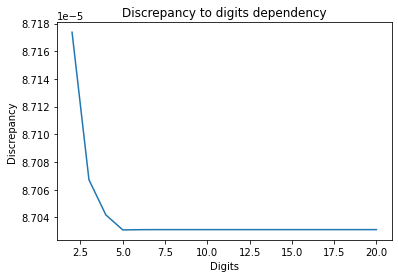

n: 8
Condidion numbers
Spectral -> 8.003644586742483, False that it is > 10000
Angular -> 1.0007098915278494, False that it is > 10000
Volume -> 1.0018405610531407, False that it is > 10000


In [49]:
def generate_strong_tridiagonal_matrix(n: int, digits: int = -1) -> np.array:
    matrix = np.empty(shape=(n, n))
    for i in range(n):
        for j in range(n):
            if j == i - 1 or j == i + 1:
                current_value = -1
            elif j == i:
                current_value = 10 ** 4
            else:
                current_value = random.uniform(7, 115)
            if digits != -1:
                if digits <= 0:
                    raise AttributeError("digits must be positive value")
                current_value = round(current_value, digits)
            matrix[i, j] = current_value
    return matrix

n = 8
matrix = generate_strong_tridiagonal_matrix(n)
matrix_and_n(matrix)